### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# <font color='blue'> Pre-process Data

- Step 1: Adding more missing values to the data in order to meet the project requirements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


classdata=pd.read_csv('framingham.csv') #reading csv file
Totalval=4240*16
ori_rat=0
for col in classdata:
    ori_rat +=  classdata[col].isna().sum()
print('Percentage of Missing Values in Original Dataset:', ori_rat*100/Totalval,'%')
print('')
print(classdata.info())
#Adding more missing values
l=classdata['education'].sample(n=650, random_state=0).index
classdata.loc[l, 'education'] = np.NaN
m=classdata['cigsPerDay'].sample(n=750, random_state=11).index
classdata.loc[m, 'cigsPerDay'] = np.NaN
n=classdata['BPMeds'].sample(n=1100, random_state=20).index
classdata.loc[n, 'BPMeds'] = np.NaN
o=classdata['glucose'].sample(n=500, random_state=300).index
classdata.loc[o, 'glucose'] = np.NaN

blk=0
for col in classdata:
    blk +=   classdata[col].isna().sum()
print('')
print('Percentage of Missing Values after adding more NaNs:', blk*100/Totalval,'%')
print('')
print(classdata.info())
print('')
print(classdata.describe())


Percentage of Missing Values in Original Dataset: 0.9507665094339622 %

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   i

- Step 2: Imputing data in BMI after grouping by male and then age. Since BMI column with missing values is continuous, I chose to replace NaN with the mean of each group.

In [3]:
classdata_grouped=classdata.groupby(['male','age'])  
classdata['BMI']= classdata_grouped.transform(lambda grp: grp.fillna(grp.mean())) #imputing data in BMI after grouping by male and then age. Since BMI column with missing values is continuous, I chose to replace NaN with the mean of each group.
print(classdata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        3500 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       3466 non-null   float64
 5   BPMeds           3102 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3394 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


- Step 3: Imputing data in remaining columns (having NaNs) after grouping by male and then age. I chose to replace NaN with the median of each group.

In [4]:
classdata_grouped2=classdata.groupby(['male','age'])  
classdata_imputed= classdata_grouped2.transform(lambda grp: grp.fillna(grp.median())) #imputing data in remaining columns with after grouping by male and then age. I chose to replace NaN with the median of each group.
print(classdata_imputed.info())

classdata_imputed.insert(0,'age',classdata['age']) #inserting column in dataset
classdata_imputed.insert(0,'male',classdata['male']) #inserting column in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   education        4240 non-null   float64
 1   currentSmoker    4240 non-null   int64  
 2   cigsPerDay       4239 non-null   float64
 3   BPMeds           4239 non-null   float64
 4   prevalentStroke  4240 non-null   int64  
 5   prevalentHyp     4240 non-null   int64  
 6   diabetes         4240 non-null   int64  
 7   totChol          4240 non-null   float64
 8   sysBP            4240 non-null   float64
 9   diaBP            4240 non-null   float64
 10  BMI              4240 non-null   float64
 11  heartRate        4240 non-null   float64
 12  glucose          4240 non-null   float64
 13  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 463.9 KB
None


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


- Step 4: Imputing data after grouping by male, to remove any NaNs which are still left.

In [5]:
classdata_grouped3=classdata_imputed.groupby(['male'])  
classdata_imputed2= classdata_grouped3.transform(lambda grp: grp.fillna(grp.median())) #imputing data after grouping by male, to remove any NaNs which are still left
classdata_imputed2.insert(0,'male',classdata_imputed['male']) #inserting column in dataset
print('')
print(classdata_imputed2.info())
print('')
print(classdata_imputed2.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None

   mal

- Step 5: Splitting data into feature set and target values

In [6]:
TargetV= classdata_imputed2['TenYearCHD']
xdataV = classdata_imputed2.iloc[:,0:15] 
print('Feature Set')
print(xdataV)
print('Target Values')
print(TargetV)

Feature Set
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         1.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        2.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
0                   0             0         0    195.0  106.0   70.0   
1                   0             0         0    250.0  121.0  

- Step 6: Plotting scatter matrix of feature set.

['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F841AC220>,
      dtype=object)

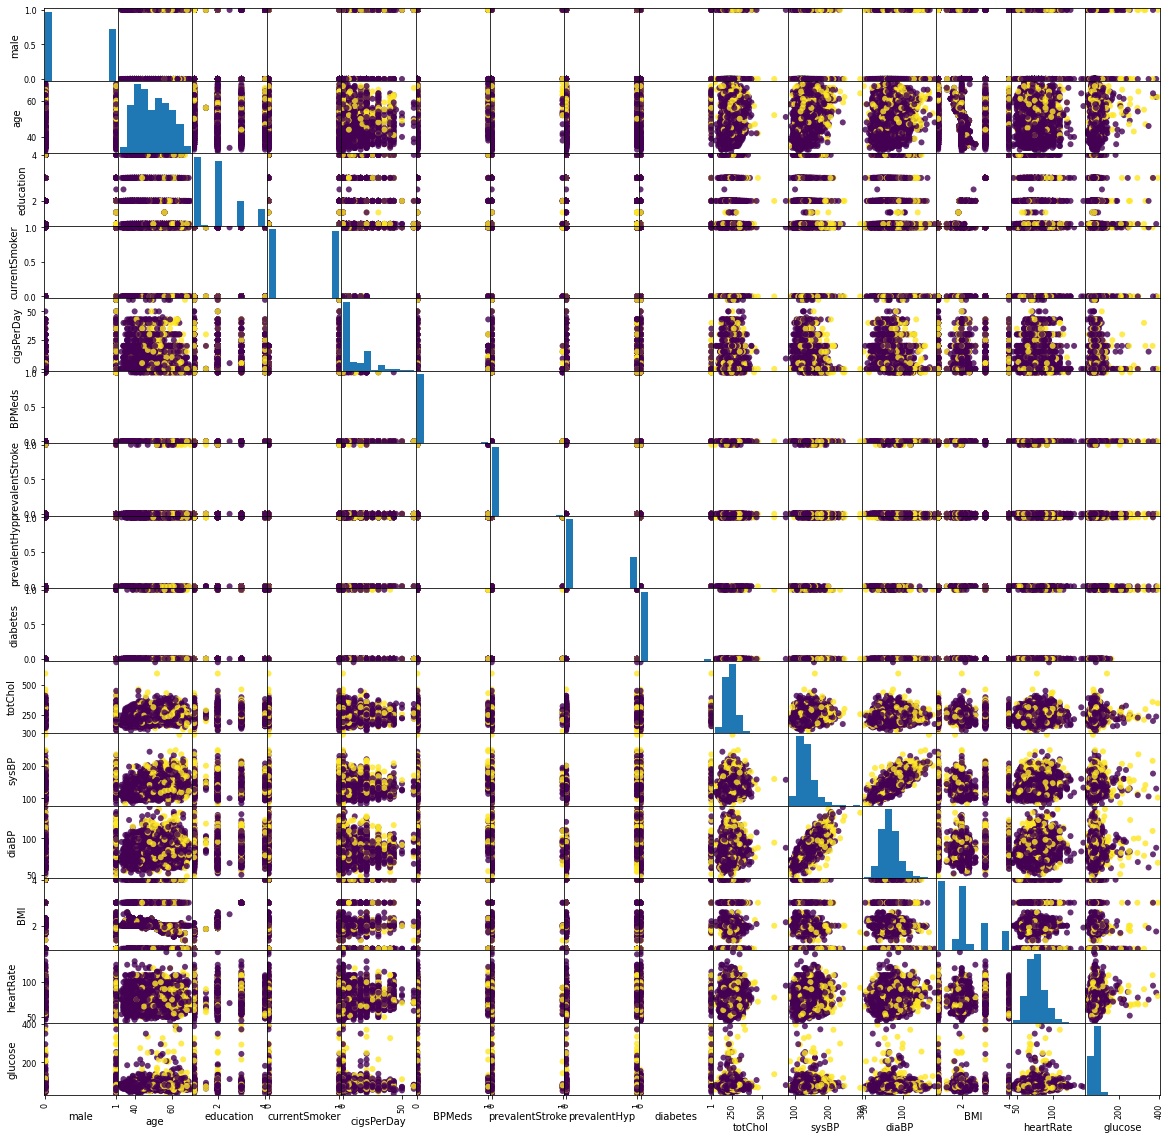

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = xdataV.columns.values
print(attributes)
scatter_matrix(xdataV[attributes], figsize = (20,20), c = TargetV, alpha = 0.8, marker = 'O')

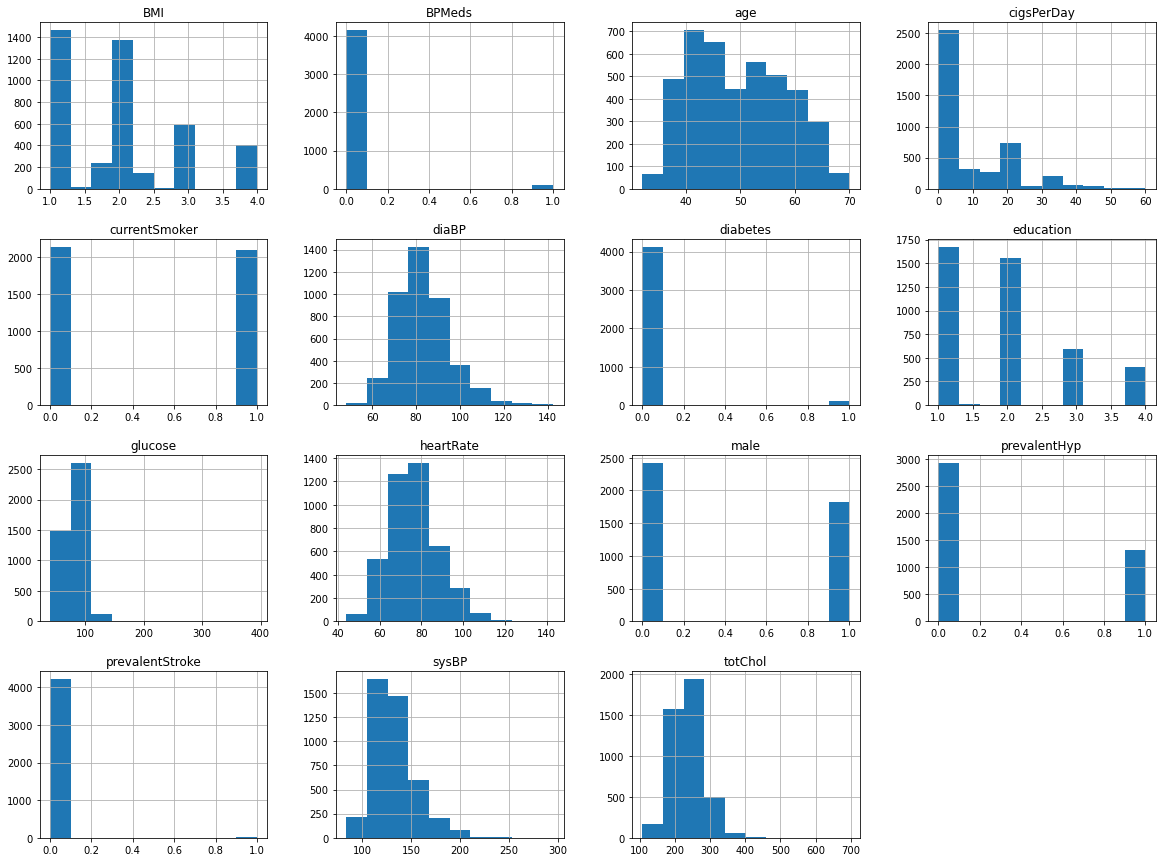

In [8]:
#checking tthe histogram of the train dataset fro each seperate columns to find their distribution
xdataV.hist(bins=10, figsize=(20, 15))
plt.show()

- Step 7: Splitting data into train and test sets, followed by scaling

Target Values Counts
(848,)
(848, 15)


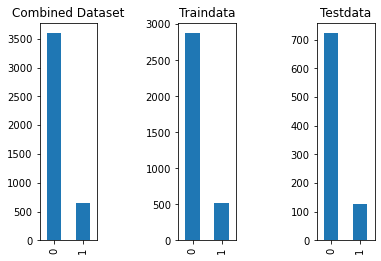

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_setC, X_test_setC, y_train_setC, y_test_setC = train_test_split(xdataV, TargetV, random_state = 0, test_size = 0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_setC)
X_test = scaler.transform(X_test_setC) 

print('Target Values Counts')
plt.subplot(1, 5, 1)
TargetV.value_counts().plot(kind='bar', title='Combined Dataset');
plt.subplot(1, 5, 3)
y_train_setC.value_counts().plot(kind='bar', title='Traindata');
plt.subplot(1, 5, 5)
y_test_setC.value_counts().plot(kind='bar', title='Testdata');
print(y_test_setC.shape)
print(X_test_setC.shape)

# <font color='blue'> Voting Classifiers

Hard Voting

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train_setC)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train_setC)
svm_clf = SVC(C = 100, probability = True)
svm_clf.fit(X_train, y_train_setC)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train_setC)

for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train_setC)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,'test accuracy score:',accuracy_score(y_test_setC, y_pred))
    print(clf.__class__.__name__,'test recall score:',recall_score(y_test_setC, y_pred))
    print('')
    

LogisticRegression test accuracy score: 0.8561320754716981
LogisticRegression test recall score: 0.07936507936507936

KNeighborsClassifier test accuracy score: 0.8443396226415094
KNeighborsClassifier test recall score: 0.05555555555555555

SVC test accuracy score: 0.8089622641509434
SVC test recall score: 0.1984126984126984

VotingClassifier test accuracy score: 0.8490566037735849
VotingClassifier test recall score: 0.05555555555555555



Soft Voting

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

log_clfs = LogisticRegression()
log_clfs.fit(X_train, y_train_setC)
knn_clfs = KNeighborsClassifier(7)
knn_clfs.fit(X_train, y_train_setC)
svm_clfs = SVC(C = 100, probability = True)
svm_clfs.fit(X_train, y_train_setC)

voting_clfs = VotingClassifier(estimators=[('lr', log_clfs), ('knn', knn_clfs), ('svc', svm_clfs)], voting='soft')
voting_clfs.fit(X_train, y_train_setC)

for clfs in (log_clfs, knn_clfs, svm_clfs, voting_clfs):
    clfs.fit(X_train, y_train_setC)
    y_preds = clfs.predict(X_test)
    print(clfs.__class__.__name__,'test accuracy score:',accuracy_score(y_test_setC, y_preds))
    print(clfs.__class__.__name__,'test recall score:',recall_score(y_test_setC, y_preds))
    print('')
    

LogisticRegression test accuracy score: 0.8561320754716981
LogisticRegression test recall score: 0.07936507936507936

KNeighborsClassifier test accuracy score: 0.8443396226415094
KNeighborsClassifier test recall score: 0.05555555555555555

SVC test accuracy score: 0.8089622641509434
SVC test recall score: 0.1984126984126984

VotingClassifier test accuracy score: 0.8537735849056604
VotingClassifier test recall score: 0.023809523809523808



# <font color='blue'> Bagging

Bagging Classifier with Decision Tree Classifier

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf_b1 = DecisionTreeClassifier(random_state=0)
bag_clf1 = BaggingClassifier(dt_clf_b1, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0, oob_score=True)

bag_clf1.fit(X_train, y_train_setC)
y_pred_b1 = bag_clf1.predict(X_test)
print('Train accuracy score: {:.2f}'.format(bag_clf1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(bag_clf1.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_b1)))
print('Out of bag score: {:.2f}'.format(bag_clf1.oob_score_))


Train accuracy score: 0.87
Test accuracy score: 0.85
Test recall score: 0.04
Out of bag score: 0.85


Bagging Classifier with Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lgreg_clf_b2 = LogisticRegression()
bag_clf2 = BaggingClassifier(lgreg_clf_b2, n_estimators=500, max_samples=500, bootstrap=True, n_jobs=-1, random_state=0, oob_score=True)

bag_clf2.fit(X_train, y_train_setC)
y_pred_b2 = bag_clf2.predict(X_test)
print('Train accuracy score: {:.10f}'.format(bag_clf2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(bag_clf2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_b2)))
print('Out of bag score: {:.2f}'.format(bag_clf2.oob_score_))



Train accuracy score: 0.8537735849
Test accuracy score: 0.86
Test recall score: 0.06
Out of bag score: 0.85


# <font color='blue'> Pasting

Pasting with SVC(rbf kernel)

In [15]:
from sklearn.svm import SVC

svm_clf_p1 = SVC(C = 100, probability = True, kernel='rbf')
pas_clf1 = BaggingClassifier(svm_clf_p1, n_estimators=500, max_samples=500, bootstrap=False, n_jobs=-1, random_state=0)

pas_clf1.fit(X_train, y_train_setC)
y_pred_p1 = pas_clf1.predict(X_test)
print('Train accuracy score: {:.2f}'.format(pas_clf1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(pas_clf1.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_p1)))

Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00


Pasting with Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

lgreg_clf_p2 = LogisticRegression()
pas_clf2 = BaggingClassifier(lgreg_clf_p2, n_estimators=500, max_samples=500, bootstrap=False, n_jobs=-1, random_state=0)

pas_clf2.fit(X_train, y_train_setC)
y_pred_p2 = pas_clf2.predict(X_test)
print('Train accuracy score: {:.2f}'.format(pas_clf2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(pas_clf2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_p2)))



Train accuracy score: 0.85
Test accuracy score: 0.86
Test recall score: 0.06


# <font color='blue'> Adaboost Boosting

Adaboost boosting with Decision Tree Classifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf1.fit(X_train, y_train_setC)
y_pred_ada1 = ada_clf1.predict(X_test)
print('Train accuracy score: {:.2f}'.format(ada_clf1.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(ada_clf1.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_ada1)))


Train accuracy score: 0.86
Test accuracy score: 0.85
Test recall score: 0.06


Adaboost boosting with Logistic Regression

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


ada_clf2 = AdaBoostClassifier(LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf2.fit(X_train, y_train_setC)
y_pred_ada2 = ada_clf2.predict(X_test)
print('Train accuracy score: {:.2f}'.format(ada_clf2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(ada_clf2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_ada2)))

Train accuracy score: 0.85
Test accuracy score: 0.86
Test recall score: 0.08


# <font color='blue'> Gradient Boosting

In [19]:
from  sklearn.ensemble import GradientBoostingClassifier


gbrt1 = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=0)
gbrt1.fit(X_train, y_train_setC)

gbrt2 = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=0)
gbrt2.fit(X_train, y_train_setC)

gbrt3 = GradientBoostingClassifier(max_depth=1, n_estimators=3, random_state=0, learning_rate=0.01)
gbrt3.fit(X_train, y_train_setC)

n=0
for gbrt in (gbrt1, gbrt2, gbrt3):
    n=n+1
    gbrt.fit(X_train, y_train_setC)
    y_pred_gbrt = gbrt.predict(X_test)
    print(gbrt.__class__.__name__,n,'Train accuracy score: {:.5f}'.format(gbrt.score(X_train, y_train_setC)))
    print(gbrt.__class__.__name__,n,'Test accuracy score: {:.5f}'.format(gbrt.score(X_test, y_test_setC)))
    print(gbrt.__class__.__name__,n,'Test recall score: {:.5f}'.format(recall_score(y_test_setC, y_pred_gbrt)))
    print('')
 

GradientBoostingClassifier 1 Train accuracy score: 0.87412
GradientBoostingClassifier 1 Test accuracy score: 0.84670
GradientBoostingClassifier 1 Test recall score: 0.07143

GradientBoostingClassifier 2 Train accuracy score: 0.85348
GradientBoostingClassifier 2 Test accuracy score: 0.85142
GradientBoostingClassifier 2 Test recall score: 0.05556

GradientBoostingClassifier 3 Train accuracy score: 0.84729
GradientBoostingClassifier 3 Test accuracy score: 0.85142
GradientBoostingClassifier 3 Test recall score: 0.00000



# <font color='blue'> Random Forest Classifier

Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.01


<IPython.core.display.Javascript object>


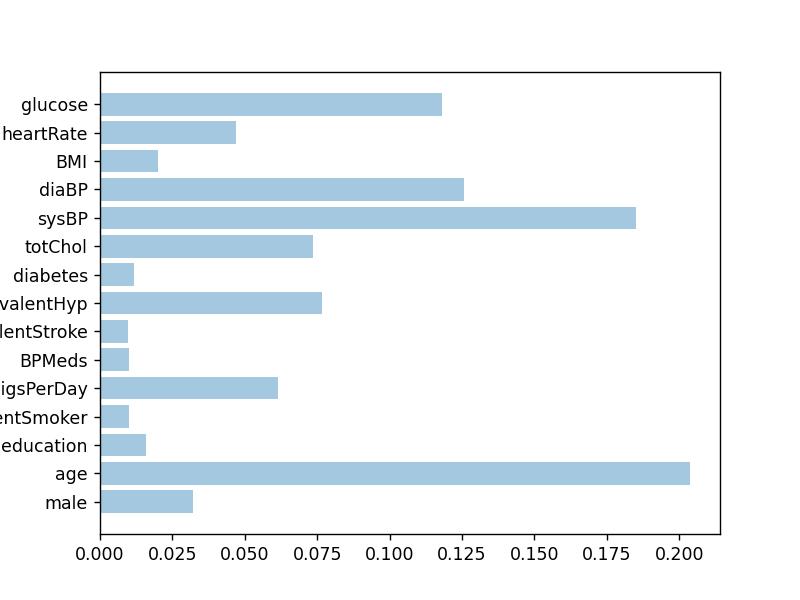

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib notebook


rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train_setC)

y_pred_rf = rnd_clf.predict(X_test)

print('Train accuracy score: {:.2f}'.format(rnd_clf.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(rnd_clf.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_rf)))



y_list = rnd_clf.feature_importances_
y_pos = np.arange(len(y_list))
features = xdataV.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.savefig('feature_importance_')
plt.show()


# <font color='blue'> Applying PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)
print(pca.n_components_)
#print(X_reduced_train.shape)

12


From this point onwards, we will use X_reduced_train and X_reduced_test for our models.

# <font color='red'> Running models using cross_val_score

## K Neighbours Classifier

Best Model Based on Recall Score
Best parameters:  1
Train accuracy score: 1.00
Test accuracy score: 0.78
Test recall score: 0.17

Best Model Based on Accuracy Score
Best parameters:  14
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.03


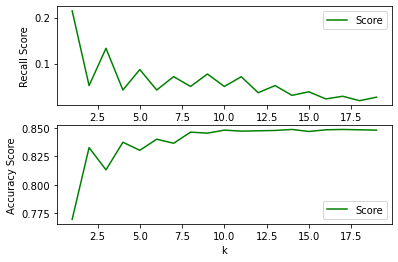

In [22]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


KNC_score_arrayR = []
KNC_score_arrayA = []


best_scoreR= -1000000000000000000000000000000000000000
best_scoreA= -1000000000000000000000000000000000000000
for k in range(1,20):
    # for each value of k
    # train a KNeighborsClassifier
    # perform cross-validation
    scoresKNCR = cross_val_score(KNeighborsClassifier(k), X_reduced_train, y_train_setC, cv=10, scoring='recall')
    scoresKNCA = cross_val_score(KNeighborsClassifier(k), X_reduced_train, y_train_setC, cv=10, scoring='accuracy')
    # compute mean cross-validation scores
    scoreR = np.mean(scoresKNCR)
    scoreA = np.mean(scoresKNCA)

    KNC_score_arrayR.append(scoreR)
    KNC_score_arrayA.append(scoreA)
    # if we got a better score, store the score and parameters
    if scoreR > best_scoreR:
        best_scoreR = scoreR
        best_parametersR = k
    if scoreA > best_scoreA:
        best_scoreA = scoreA
        best_parametersA = k

KNCx_axis = range(1,20)
plt.subplot(2, 1, 1)
plt.plot(KNCx_axis, KNC_score_arrayR, c = 'g', label = 'Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Recall Score')    

plt.subplot(2, 1, 2)
plt.plot(KNCx_axis, KNC_score_arrayA, c = 'g', label = 'Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy Score') 

print('Best Model Based on Recall Score')
# rebuild a model using best parameters(based on recall score)
knC_reg1 = KNeighborsClassifier(best_parametersR)
knC_reg1.fit(X_reduced_train, y_train_setC)
y_pred_knC_reg1 = knC_reg1.predict(X_reduced_test)
print("Best parameters: ", best_parametersR)
print('Train accuracy score: {:.2f}'.format(knC_reg1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(knC_reg1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_knC_reg1 )))

print('')
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
knC_reg2 = KNeighborsClassifier(best_parametersA)
knC_reg2.fit(X_reduced_train, y_train_setC)
y_pred_knC_reg2 = knC_reg2.predict(X_reduced_test)
print("Best parameters: ", best_parametersA)
print('Train accuracy score: {:.2f}'.format(knC_reg2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(knC_reg2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_knC_reg2 )))



### Logistic Regression

In [23]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np


logreg_score_arrayR = []
logreg_score_arrayA = []
best_scoreR= -1000000000000000000000000000000000000000
best_scoreA= -1000000000000000000000000000000000000000

for penalty in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100, 500]:
        # train a LogisticRegression
        # perform cross-validation
        scoreslogregR=cross_val_score(LogisticRegression(solver='liblinear', penalty = penalty, C = C), X_reduced_train, y_train_setC, scoring='recall', cv=10)
        scoreslogregA=cross_val_score(LogisticRegression(solver='liblinear', penalty = penalty, C = C), X_reduced_train, y_train_setC, scoring='accuracy', cv=10)

        # compute mean cross-validation 
        scoreR = np.mean(scoreslogregR)
        scoreA = np.mean(scoreslogregA)
        logreg_score_arrayR.append(scoreR)
        logreg_score_arrayA.append(scoreA)
        # if we got a better score, store the score and parameters
        if scoreR > best_scoreR:
            best_scoreR = scoreR
            best_parametersRC = C
            best_parametersRpenalty= penalty
        if scoreA > best_scoreA:
            best_scoreA = scoreA
            best_parametersAC = C
            best_parametersApenalty= penalty

            
print('Best Model Based on Recall Score')
# rebuild a model using best parameters(based on recall score)
log_reg1 = LogisticRegression(solver='liblinear', penalty = best_parametersRpenalty, C = best_parametersRC)
log_reg1.fit(X_reduced_train, y_train_setC)
y_pred_log_reg1 = log_reg1.predict(X_reduced_test)
print('Best parameters: C=',best_parametersRC,'penalty=',best_parametersRpenalty)
print('Train accuracy score: {:.2f}'.format(log_reg1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(log_reg1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_log_reg1 )))

print('')
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
log_reg2 = LogisticRegression(solver='liblinear', penalty = best_parametersApenalty, C = best_parametersAC)
log_reg2.fit(X_reduced_train, y_train_setC)
y_pred_log_reg2 = log_reg2.predict(X_reduced_test)
print('Best parameters: C=',best_parametersAC,'penalty=',best_parametersApenalty)
print('Train accuracy score: {:.2f}'.format(log_reg2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(log_reg2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_log_reg2)))

    

Best Model Based on Recall Score
Best parameters: C= 0.001 penalty= l2
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.08

Best Model Based on Accuracy Score
Best parameters: C= 0.01 penalty= l2
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.05


### Support Vector Machines

LinearSVC

In [24]:
from sklearn.svm import LinearSVC


lsvc_score_arrayR = []
lsvc_score_arrayA = []
best_scoreR= -1000000000000000000000000000000000000000
best_scoreA= -1000000000000000000000000000000000000000

for penalty in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100, 500]:
        # train a linearSVC
        # perform cross-validation
        scoreslsvcR=cross_val_score(LinearSVC(penalty = penalty, C = C), X_reduced_train, y_train_setC, scoring='recall', cv=10)
        scoreslsvcA=cross_val_score(LinearSVC(penalty = penalty, C = C), X_reduced_train, y_train_setC, scoring='accuracy', cv=10)

        # compute mean cross-validation 
        scoreR = np.mean(scoreslsvcR)
        scoreA = np.mean(scoreslsvcA)
        lsvc_score_arrayR.append(scoreR)
        lsvc_score_arrayA.append(scoreA)
        # if we got a better score, store the score and parameters
        if scoreR > best_scoreR:
            best_scoreR = scoreR
            best_parametersRC = C
            best_parametersRpenalty= penalty
        if scoreA > best_scoreA:
            best_scoreA = scoreA
            best_parametersAC = C
            best_parametersApenalty= penalty

print('Best Model Based on Recall Score')
# rebuild a model using best parameters(based on recall score)
l_svc1 = LinearSVC(penalty = best_parametersRpenalty, C = best_parametersRC)
l_svc1.fit(X_reduced_train, y_train_setC)
y_pred_l_svc1 = l_svc1.predict(X_reduced_test)
print('Best parameters: C=',best_parametersRC,'penalty=',best_parametersRpenalty)
print('Train accuracy score: {:.2f}'.format(l_svc1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(l_svc1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_l_svc1 )))

print('')
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
l_svc2 = LinearSVC(penalty = best_parametersApenalty, C = best_parametersAC)
l_svc2.fit(X_reduced_train, y_train_setC)
y_pred_l_svc2 = l_svc2.predict(X_reduced_test)
print('Best parameters: C=',best_parametersAC,'penalty=',best_parametersApenalty)
print('Train accuracy score: {:.2f}'.format(l_svc2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(l_svc2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_l_svc2 )))

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_li

Best Model Based on Recall Score
Best parameters: C= 500 penalty= l2
Train accuracy score: 0.84
Test accuracy score: 0.84
Test recall score: 0.02

Best Model Based on Accuracy Score
Best parameters: C= 0.001 penalty= l2
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.03


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM with rbf kernel

In [26]:
from sklearn.svm import SVC

best_scoreR= -1000000000000000000000000000000000000000
best_scoreA= -1000000000000000000000000000000000000000
SVCrbf_score_arrayR = []
SVCrbf_score_arrayA = []


for gamma in [0.001, 0.01, 0.1, 1, 10, 100, 500]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100, 500]:
        # for each combination of parameters
        # perform cross-validation
        scoresSVCrbfR= cross_val_score(SVC(kernel='rbf', gamma=gamma, C=C), X_reduced_train, y_train_setC, scoring='recall', cv=10)
        scoresSVCrbfA= cross_val_score(SVC(kernel='rbf', gamma=gamma, C=C), X_reduced_train, y_train_setC, scoring='accuracy', cv=10)
        # compute mean cross-validation recall
        scoreR = np.mean(scoresSVCrbfR)
        scoreA = np.mean(scoresSVCrbfA)
        SVCrbf_score_arrayR.append(scoreR)
        SVCrbf_score_arrayA.append(scoreA)
        # if we got a better score, store the score and parameters
        if scoreR > best_scoreR:
            best_scoreR = scoreR
            best_parametersRC = C
            best_parametersRgamma= gamma
        if scoreA > best_scoreA:
            best_scoreA = scoreA
            best_parametersAC = C
            best_parametersAgamma= gamma
            
print('Best Model Based on Recall Score')
# rebuild a model using best parameters(based on recall score)
svc_rbf1 = SVC(kernel='rbf', gamma=best_parametersRgamma, C=best_parametersRC)
svc_rbf1.fit(X_reduced_train, y_train_setC)
y_pred_svc_rbf1 = svc_rbf1.predict(X_reduced_test)
print('Best parameters: C=',best_parametersRC,'gamma=',best_parametersRgamma)
print('Train accuracy score: {:.2f}'.format(svc_rbf1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_rbf1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_rbf1 )))

print('')
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
svc_rbf2 = SVC(kernel='rbf', gamma=best_parametersAgamma, C=best_parametersAC)
svc_rbf2.fit(X_reduced_train, y_train_setC)
y_pred_svc_rbf2 = svc_rbf2.predict(X_reduced_test)
print('Best parameters: C=',best_parametersAC,'gamma=',best_parametersAgamma)
print('Train accuracy score: {:.2f}'.format(svc_rbf2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_rbf2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_rbf2 )))

Best Model Based on Recall Score
Best parameters: C= 500 gamma= 0.1
Train accuracy score: 0.97
Test accuracy score: 0.79
Test recall score: 0.19

Best Model Based on Accuracy Score
Best parameters: C= 100 gamma= 0.001
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.02


Sampling our training set since SVC kernel: linear and poly were taking a very long time to run through the full training dataset

In [27]:
playdata2= np.column_stack((X_reduced_train, y_train_setC))
np.random.seed(0)
indices = np.random.randint(0,playdata2.shape[0],800)
playdata2sampled=playdata2[indices]
X_reduced_train_sampled=playdata2sampled[:,0:12]
y_train_setC_sampled=playdata2sampled[:,12]

SVM with linear kernel

In [28]:
from sklearn.svm import SVC


best_scoreR= -1000000000000000000000000000000000000000
best_scoreA= -1000000000000000000000000000000000000000
SVClin_score_arrayR = []
SVClin_score_arrayA = []


for C in [0.001, 0.01, 0.1, 1, 10, 20, 30, 40]:
    # perform cross-validation
    scoresSVClinR= cross_val_score(SVC(kernel='linear', C=C), X_reduced_train_sampled, y_train_setC_sampled, scoring='recall', cv=10)
    scoresSVClinA= cross_val_score(SVC(kernel='linear', C=C), X_reduced_train_sampled, y_train_setC_sampled, scoring='accuracy', cv=10)
    # compute mean cross-validation recall
    scoreR = np.mean(scoresSVClinR)
    SVClin_score_arrayR.append(scoreR)
    scoreA = np.mean(scoresSVClinA)
    SVClin_score_arrayA.append(scoreA)
    #if we got a better score, store the score and parameters
    if scoreR > best_scoreR:
        best_scoreR = scoreR
        best_parametersRC = C
    if scoreA > best_scoreA:
        best_scoreA = scoreA
        best_parametersAC = C
            
            
            
print('Best Model Based on Recall Score')
# rebuild a model using best parameters(based on recall score) and fit on full train data
svc_lin1 = SVC(kernel='linear', C=best_parametersRC)
svc_lin1.fit(X_reduced_train, y_train_setC)
y_pred_svc_lin1 = svc_lin1.predict(X_reduced_test)
print('Best parameters: C=',best_parametersRC)
print('Train accuracy score: {:.2f}'.format(svc_lin1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_lin1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_lin1 )))

print('')
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
svc_lin2 = SVC(kernel='linear', C=best_parametersAC)
svc_lin2.fit(X_reduced_train, y_train_setC)
y_pred_svc_lin2= svc_lin2.predict(X_reduced_test)
print('Best parameters: C=',best_parametersAC)
print('Train accuracy score: {:.2f}'.format(svc_lin2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_lin2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_lin2 )))



Best Model Based on Recall Score
Best parameters: C= 0.1
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00

Best Model Based on Accuracy Score
Best parameters: C= 0.001
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00


SVM with poly kernel

In [29]:
from sklearn.svm import SVC


best_scoreR= -1000000000000000000000000000000000000000
best_scoreA= -1000000000000000000000000000000000000000
SVCpoly_score_arrayR = []
SVCpoly_score_arrayA = []

for degree in [3, 4, 5]:
    for gamma in [0.001, 0.01, 0.1, 1, 10, 20]:
        for C in [0.001, 0.01, 0.1, 1]:
            # for each combination of parameters
            # perform cross-validation
            scoresSVCpolyR= cross_val_score(SVC(kernel='poly', gamma=gamma, C=C, degree=degree), X_reduced_train_sampled, y_train_setC_sampled, scoring='recall', cv=10)
            scoresSVCpolyA= cross_val_score(SVC(kernel='poly', gamma=gamma, C=C, degree=degree), X_reduced_train_sampled, y_train_setC_sampled, scoring='accuracy', cv=10)
            # compute mean cross-validation 
            scoreR = np.mean(scoresSVCpolyR)
            SVCpoly_score_arrayR.append(scoreR)
            scoreA = np.mean(scoresSVCpolyA)
            SVCpoly_score_arrayA.append(scoreA)
            # if we got a better score, store the score and parameters
            if scoreR > best_scoreR:
                best_scoreR = scoreR
                best_parametersRC = C
                best_parametersRgamma= gamma
                best_parametersRdegree= degree
            if scoreA > best_scoreA:
                best_scoreA = scoreA
                best_parametersAC = C
                best_parametersAgamma= gamma
                best_parametersAdegree= degree    
            
            
print('Best Model Based on Recall Score')
# rebuild a model using best parameters(based on recall score) and fit on full train data
svc_poly1 = SVC(kernel='poly', gamma=best_parametersRgamma, C=best_parametersRC, degree=best_parametersRdegree)
svc_poly1.fit(X_reduced_train, y_train_setC)
y_pred_svc_poly1 = svc_poly1.predict(X_reduced_test)
print('Best parameters: C=',best_parametersRC,'gamma=',best_parametersRgamma,'degree=',best_parametersRdegree)
print('Train accuracy score: {:.2f}'.format(svc_poly1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_poly1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_poly1 )))

print('')
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data            
svc_poly2 = SVC(kernel='poly', gamma=best_parametersAgamma, C=best_parametersAC, degree=best_parametersAdegree)
svc_poly2.fit(X_reduced_train, y_train_setC)
y_pred_svc_poly2 = svc_poly2.predict(X_reduced_test)
print('Best parameters: C=',best_parametersAC,'gamma=',best_parametersAgamma,'degree=',best_parametersAdegree)
print('Train accuracy score: {:.2f}'.format(svc_poly2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_poly2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_poly2 )))


Best Model Based on Recall Score
Best parameters: C= 0.1 gamma= 1 degree= 5
Train accuracy score: 1.00
Test accuracy score: 0.73
Test recall score: 0.24

Best Model Based on Accuracy Score
Best parameters: C= 0.1 gamma= 0.1 degree= 3
Train accuracy score: 0.86
Test accuracy score: 0.85
Test recall score: 0.02


### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier


best_scoreR= -1000000000000000000000000000000000000000
best_scoreA= -1000000000000000000000000000000000000000
dtree_score_arrayR = []
dtree_score_arrayA = []


for maxdepth in range(1,51):
    # perform cross-validation
    scorestreeR= cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=maxdepth), X_reduced_train, y_train_setC, scoring='recall', cv=10)
    scorestreeA= cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=maxdepth), X_reduced_train, y_train_setC, scoring='accuracy', cv=10)
    # compute mean cross-validation recall
    scoreR = np.mean(scorestreeR)
    dtree_score_arrayR.append(scoreR)
    scoreA = np.mean(scorestreeA)
    dtree_score_arrayA.append(scoreA)
    #if we got a better score, store the score and parameters
    if scoreR > best_scoreR:
        best_scoreR = scoreR
        best_parametersRmax_depth = maxdepth
    if scoreA > best_scoreA:
        best_scoreA = scoreA
        best_parametersAmax_depth = maxdepth

print('Best Model Based on Recall Score')
# rebuild a model using best parameters(based on recall score) 
d_tree1 = DecisionTreeClassifier(random_state=0, max_depth=best_parametersRmax_depth)
d_tree1.fit(X_reduced_train, y_train_setC)
y_pred_d_tree1 = d_tree1.predict(X_reduced_test)
print('Best parameters: max_depth=',best_parametersRmax_depth)
print('Train accuracy score: {:.2f}'.format(d_tree1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(d_tree1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_d_tree1 )))

print('')
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)             
d_tree2 = DecisionTreeClassifier(random_state=0, max_depth=best_parametersAmax_depth)
d_tree2.fit(X_reduced_train, y_train_setC)
y_pred_d_tree2 = d_tree2.predict(X_reduced_test)
print('Best parameters: max_depth=',best_parametersAmax_depth)
print('Train accuracy score: {:.2f}'.format(d_tree2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(d_tree2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_d_tree2 )))
        
        
        

Best Model Based on Recall Score
Best parameters: max_depth= 20
Train accuracy score: 0.99
Test accuracy score: 0.76
Test recall score: 0.18

Best Model Based on Accuracy Score
Best parameters: max_depth= 2
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00


# <font color='red'> Running models using GridSearch

### K Neighbours Classifier

In [31]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': np.arange(1, 20)}
knC_reg_gsR = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='recall', return_train_score=True)
knC_reg_gsA = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

knC_reg_gsR.fit(X_reduced_train,y_train_setC)
knC_reg_gsA.fit(X_reduced_train,y_train_setC)
 

print('Default Threshold')
print('Best Model (1) Based on Recall Score')
# rebuild a model using best parameters(based on recall score)
knC_reg_gs1 = KNeighborsClassifier(**knC_reg_gsR.best_params_)
knC_reg_gs1.fit(X_reduced_train, y_train_setC)
y_pred_knC_reg_gs1= knC_reg_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(knC_reg_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(knC_reg_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(knC_reg_gs1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_knC_reg_gs1 )))

print('')
print('Best Model (2) Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
knC_reg_gs2 = KNeighborsClassifier(**knC_reg_gsA.best_params_)
knC_reg_gs2.fit(X_reduced_train, y_train_setC)
y_pred_knC_reg_gs2= knC_reg_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(knC_reg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(knC_reg_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(knC_reg_gs2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_knC_reg_gs2 )))


print('')
print('Threshold changed to 0.84')
y_pred_knC_prob1= knC_reg_gs1.predict_proba(X_reduced_test)[:,0]
y_pred_knC_prob2= knC_reg_gs2.predict_proba(X_reduced_test)[:,0]

y_pred_knC_predic1= []
y_pred_knC_predic2= []

for i in range(0,848):
    if y_pred_knC_prob1[i]>=0.84:
        y_pred_knC_predic1.append(0)
    else:
        y_pred_knC_predic1.append(1)

    if y_pred_knC_prob2[i]>=0.84:
        y_pred_knC_predic2.append(0)
    else:
        y_pred_knC_predic2.append(1)
        
print('Model 1 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_knC_predic1)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_knC_predic1 )))
print('')
print('Model 2 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_knC_predic2)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_knC_predic2 )))





Default Threshold
Best Model (1) Based on Recall Score
Best parameters: {'n_neighbors': 1}
Train accuracy score: 1.00
Test accuracy score: 0.78
Test recall score: 0.17

Best Model (2) Based on Accuracy Score
Best parameters: {'n_neighbors': 14}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.03

Threshold changed to 0.84
Model 1 updated scores
Test accuracy score: 0.78
Test recall score: 0.17

Model 2 updated scores
Test accuracy score: 0.70
Test recall score: 0.48


### Logistic Regression


In [32]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'solver':['liblinear']}
logreg_gsR = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='recall', return_train_score=True)
logreg_gsA = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

logreg_gsR.fit(X_reduced_train,y_train_setC)
logreg_gsA.fit(X_reduced_train,y_train_setC)
 

print('Default Threshold')
print('Best Model (1) Based on Recall Score')
# rebuild a model using best parameters(based on recall score)
log_reg_gs1 = LogisticRegression(**logreg_gsR.best_params_)
log_reg_gs1.fit(X_reduced_train, y_train_setC)
y_pred_log_reg_gs1= log_reg_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(logreg_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(log_reg_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(log_reg_gs1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_log_reg_gs1 )))

print('')
print('Best Model (2) Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
log_reg_gs2 = LogisticRegression(**logreg_gsA.best_params_)
log_reg_gs2.fit(X_reduced_train, y_train_setC)
y_pred_log_reg_gs2= log_reg_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(logreg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(log_reg_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(log_reg_gs2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_log_reg_gs2 )))


print('')
print('Threshold changed to 0.84')
y_pred_logreg_prob1= log_reg_gs1.predict_proba(X_reduced_test)[:,0]
y_pred_logreg_prob2= log_reg_gs2.predict_proba(X_reduced_test)[:,0]

y_pred_logreg_predic1= []
y_pred_logreg_predic2= []

for i in range(0,848):
    if y_pred_logreg_prob1[i]>=0.84:
        y_pred_logreg_predic1.append(0)
    else:
        y_pred_logreg_predic1.append(1)

    if y_pred_logreg_prob2[i]>=0.84:
        y_pred_logreg_predic2.append(0)
    else:
        y_pred_logreg_predic2.append(1)
        
print('Model 1 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_logreg_predic1)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_logreg_predic1 )))
print('')
print('Model 2 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_logreg_predic2)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_logreg_predic2 )))


    

Default Threshold
Best Model (1) Based on Recall Score
Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.08

Best Model (2) Based on Accuracy Score
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.05

Threshold changed to 0.84
Model 1 updated scores
Test accuracy score: 0.15
Test recall score: 1.00

Model 2 updated scores
Test accuracy score: 0.52
Test recall score: 0.79


### Support Vector Machines


LinearSVC

In [33]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'random_state':[0]}
lsvc_gsR = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='recall', return_train_score=True)
lsvc_gsA = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

lsvc_gsR.fit(X_reduced_train,y_train_setC)
lsvc_gsA.fit(X_reduced_train,y_train_setC)
 

print('Default Threshold')
print('Best Model (1) Based on Recall Score')
# rebuild a model using best parameters(based on recall score)
l_svc_gs1 = LinearSVC(**lsvc_gsR.best_params_)
l_svc_gs1.fit(X_reduced_train, y_train_setC)
y_pred_l_svc_gs1= l_svc_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(lsvc_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(l_svc_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(l_svc_gs1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_l_svc_gs1 )))

print('')
print('Best Model (2) Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
l_svc_gs2 = LinearSVC(**lsvc_gsA.best_params_)
l_svc_gs2.fit(X_reduced_train, y_train_setC)
y_pred_l_svc_gs2= l_svc_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(lsvc_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(l_svc_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(l_svc_gs2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_l_svc_gs2 )))

print('')
print('Cannot change threshold, since we donot have a probability parameter')


    

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_li

Default Threshold
Best Model (1) Based on Recall Score
Best parameters: {'C': 100, 'penalty': 'l2', 'random_state': 0}
Train accuracy score: 0.84
Test accuracy score: 0.83
Test recall score: 0.06

Best Model (2) Based on Accuracy Score
Best parameters: {'C': 0.001, 'penalty': 'l2', 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.03

Cannot change threshold, since we donot have a probability parameter


c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Using sampled data for SVC kernel: rbf, linear and poly as they were taking a very long time to run through the full training dataset

SVM with rbf kernel

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score



param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'kernel':['rbf'],
              'random_state': [0],
              'probability':[True]}
svcrbf_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='recall', return_train_score=True)
svcrbf_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
svcrbf_gsR.fit(X_reduced_train_sampled, y_train_setC_sampled)
svcrbf_gsA.fit(X_reduced_train_sampled, y_train_setC_sampled)
 

print('Default Threshold')
print('Best Model (1) Based on Recall Score')
# rebuild a model using best parameters(based on recall score) and fit on full train data
svc_rbf_gs1 = SVC(**svcrbf_gsR.best_params_)
svc_rbf_gs1.fit(X_reduced_train, y_train_setC)
y_pred_svc_rbf_gs1= svc_rbf_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(svcrbf_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_rbf_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_rbf_gs1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_rbf_gs1 )))

print('')
print('Best Model (2) Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
svc_rbf_gs2 = SVC(**svcrbf_gsA.best_params_)
svc_rbf_gs2.fit(X_reduced_train, y_train_setC)
y_pred_svc_rbf_gs2= svc_rbf_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(svcrbf_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_rbf_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_rbf_gs2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_rbf_gs2 )))


print('')
print('Threshold changed to 0.84')
y_pred_svcrbf_prob1= svc_rbf_gs1.predict_proba(X_reduced_test)[:,0]
y_pred_svcrbf_prob2= svc_rbf_gs2.predict_proba(X_reduced_test)[:,0]

y_pred_svcrbf_predic1= []
y_pred_svcrbf_predic2= []

for i in range(0,848):
    if y_pred_svcrbf_prob1[i]>=0.84:
        y_pred_svcrbf_predic1.append(0)
    else:
        y_pred_svcrbf_predic1.append(1)

    if y_pred_svcrbf_prob2[i]>=0.84:
        y_pred_svcrbf_predic2.append(0)
    else:
        y_pred_svcrbf_predic2.append(1)
        
print('Model 1 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_svcrbf_predic1)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svcrbf_predic1 )))
print('')
print('Model 2 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_svcrbf_predic2)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svcrbf_predic2 )))


Default Threshold
Best Model (1) Based on Recall Score
Best parameters: {'C': 500, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 0.97
Test accuracy score: 0.79
Test recall score: 0.19

Best Model (2) Based on Accuracy Score
Best parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.85
Test recall score: 0.00

Threshold changed to 0.84
Model 1 updated scores
Test accuracy score: 0.68
Test recall score: 0.45

Model 2 updated scores
Test accuracy score: 0.85
Test recall score: 0.00


SVM with linear kernel

In [35]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40],
              'random_state': [0],
              'kernel':['linear'],
              'probability':[True]}
svclin_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='recall', return_train_score=True)
svclin_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
svclin_gsR.fit(X_reduced_train_sampled, y_train_setC_sampled)
svclin_gsA.fit(X_reduced_train_sampled, y_train_setC_sampled)
 

print('Default Threshold')
print('Best Model (1) Based on Recall Score')
# rebuild a model using best parameters(based on recall score) and fit on full train data
svc_lin_gs1 = SVC(**svclin_gsR.best_params_)
svc_lin_gs1.fit(X_reduced_train, y_train_setC)
y_pred_svc_lin_gs1= svc_lin_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(svclin_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_lin_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_lin_gs1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_lin_gs1 )))

print('')
print('Best Model (2) Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
svc_lin_gs2 = SVC(**svclin_gsA.best_params_)
svc_lin_gs2.fit(X_reduced_train, y_train_setC)
y_pred_svc_lin_gs2= svc_lin_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(svclin_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_lin_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_lin_gs2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_lin_gs2 )))


print('')
print('Threshold changed to 0.84')
y_pred_svclin_prob1= svc_lin_gs1.predict_proba(X_reduced_test)[:,0]
y_pred_svclin_prob2= svc_lin_gs2.predict_proba(X_reduced_test)[:,0]

y_pred_svclin_predic1= []
y_pred_svclin_predic2= []

for i in range(0,848):
    if y_pred_svclin_prob1[i]>=0.84:
        y_pred_svclin_predic1.append(0)
    else:
        y_pred_svclin_predic1.append(1)

    if y_pred_svclin_prob2[i]>=0.84:
        y_pred_svclin_predic2.append(0)
    else:
        y_pred_svclin_predic2.append(1)
        
print('Model 1 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_svclin_predic1)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svclin_predic1 )))
print('')
print('Model 2 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_svclin_predic2)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svclin_predic2 )))




Default Threshold
Best Model (1) Based on Recall Score
Best parameters: {'C': 0.1, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00

Best Model (2) Based on Accuracy Score
Best parameters: {'C': 0.001, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00

Threshold changed to 0.84
Model 1 updated scores
Test accuracy score: 0.49
Test recall score: 0.64

Model 2 updated scores
Test accuracy score: 0.68
Test recall score: 0.42


SVM with poly kernel

In [36]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 20],
              'degree': [3,4,5],
              'random_state': [0],
              'kernel':['poly'],
              'probability':[True]}
svcpoly_gsR = GridSearchCV(SVC(), param_grid, cv=10, scoring='recall', return_train_score=True)
svcpoly_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
svcpoly_gsR.fit(X_reduced_train_sampled, y_train_setC_sampled)
svcpoly_gsA.fit(X_reduced_train_sampled, y_train_setC_sampled)
 

print('Default Threshold')
print('Best Model (1) Based on Recall Score')
# rebuild a model using best parameters(based on recall score) and fit on full train data
svc_poly_gs1 = SVC(**svcpoly_gsR.best_params_)
svc_poly_gs1.fit(X_reduced_train, y_train_setC)
y_pred_svc_poly_gs1= svc_poly_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(svcpoly_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_poly_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_poly_gs1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_poly_gs1 )))

print('')
print('Best Model (2) Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
svc_poly_gs2 = SVC(**svcpoly_gsA.best_params_)
svc_poly_gs2.fit(X_reduced_train, y_train_setC)
y_pred_svc_poly_gs2= svc_poly_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(svcpoly_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(svc_poly_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(svc_poly_gs2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svc_poly_gs2 )))



print('')
print('Threshold changed to 0.84')
y_pred_svcpoly_prob1= svc_poly_gs1.predict_proba(X_reduced_test)[:,0]
y_pred_svcpoly_prob2= svc_poly_gs2.predict_proba(X_reduced_test)[:,0]

y_pred_svcpoly_predic1= []
y_pred_svcpoly_predic2= []

for i in range(0,848):
    if y_pred_svcpoly_prob1[i]>=0.84:
        y_pred_svcpoly_predic1.append(0)
    else:
        y_pred_svcpoly_predic1.append(1)

    if y_pred_svcpoly_prob2[i]>=0.84:
        y_pred_svcpoly_predic2.append(0)
    else:
        y_pred_svcpoly_predic2.append(1)
        
print('Model 1 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_svcpoly_predic1)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svcpoly_predic1 )))
print('')
print('Model 2 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_svcpoly_predic2)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_svcpoly_predic2 )))







Default Threshold
Best Model (1) Based on Recall Score
Best parameters: {'C': 0.001, 'degree': 5, 'gamma': 10, 'kernel': 'poly', 'probability': True, 'random_state': 0}
Train accuracy score: 1.00
Test accuracy score: 0.72
Test recall score: 0.26

Best Model (2) Based on Accuracy Score
Best parameters: {'C': 0.001, 'degree': 5, 'gamma': 0.1, 'kernel': 'poly', 'probability': True, 'random_state': 0}
Train accuracy score: 0.86
Test accuracy score: 0.85
Test recall score: 0.01

Threshold changed to 0.84
Model 1 updated scores
Test accuracy score: 0.85
Test recall score: 0.01

Model 2 updated scores
Test accuracy score: 0.85
Test recall score: 0.10


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
              'random_state': [0]}
dtree_gsR = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='recall', return_train_score=True)
dtree_gsA = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
dtree_gsR.fit(X_reduced_train, y_train_setC)
dtree_gsA.fit(X_reduced_train, y_train_setC)
 

print('Default Threshold')
print('Best Model (1) Based on Recall Score')
# rebuild a model using best parameters(based on recall score) and fit on full train data
d_tree_gs1 = DecisionTreeClassifier(**dtree_gsR.best_params_)
d_tree_gs1.fit(X_reduced_train, y_train_setC)
y_pred_d_tree_gs1= d_tree_gs1.predict(X_reduced_test)
print("Best parameters: {}".format(dtree_gsR.best_params_))
print('Train accuracy score: {:.2f}'.format(d_tree_gs1.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(d_tree_gs1.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_d_tree_gs1 )))

print('')
print('Best Model (2) Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
d_tree_gs2 = DecisionTreeClassifier(**dtree_gsA.best_params_)
d_tree_gs2.fit(X_reduced_train, y_train_setC)
y_pred_d_tree_gs2= d_tree_gs2.predict(X_reduced_test)
print("Best parameters: {}".format(dtree_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(d_tree_gs2.score(X_reduced_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(d_tree_gs2.score(X_reduced_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_d_tree_gs2 )))



print('')
print('Threshold changed to 0.84')
y_pred_dtree_prob1= d_tree_gs1.predict_proba(X_reduced_test)[:,0]
y_pred_dtree_prob2= d_tree_gs2.predict_proba(X_reduced_test)[:,0]

y_pred_dtree_predic1= []
y_pred_dtree_predic2= []

for i in range(0,848):
    if y_pred_dtree_prob1[i]>=0.84:
        y_pred_dtree_predic1.append(0)
    else:
        y_pred_dtree_predic1.append(1)

    if y_pred_dtree_prob2[i]>=0.84:
        y_pred_dtree_predic2.append(0)
    else:
        y_pred_dtree_predic2.append(1)
        
print('Model 1 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_dtree_predic1)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_dtree_predic1 )))
print('')
print('Model 2 updated scores')
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_dtree_predic2)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_dtree_predic2 )))

        
        
        

Default Threshold
Best Model (1) Based on Recall Score
Best parameters: {'max_depth': 20, 'random_state': 0}
Train accuracy score: 0.99
Test accuracy score: 0.76
Test recall score: 0.18

Best Model (2) Based on Accuracy Score
Best parameters: {'max_depth': 2, 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00

Threshold changed to 0.84
Model 1 updated scores
Test accuracy score: 0.76
Test recall score: 0.18

Model 2 updated scores
Test accuracy score: 0.72
Test recall score: 0.49


# <font color='blue'> Models missed in Project 1 Classification part 

In Project 1, I selected the parameters of all of my models on the basis of 'recall' score. Since in Project 2, I am also using 'accuracy' score as a parameter selecting criteria in GridSearchCV, I have thus run the below models from project 1 again with 'accuracy' score as the parameter selecting criterion, to allow for a fair comparison.   

### K Neighbours Classifier (without PCA)

In [38]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': np.arange(1, 20)}
NknC_reg_gsA = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

NknC_reg_gsA.fit(X_train,y_train_setC)
 
print('Best Model based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
NknC_reg_gs2 = KNeighborsClassifier(**NknC_reg_gsA.best_params_)
NknC_reg_gs2.fit(X_train, y_train_setC)
Ny_pred_knC_reg_gs2= NknC_reg_gs2.predict(X_test)
print("Best parameters: {}".format(NknC_reg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(NknC_reg_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(NknC_reg_gs2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, Ny_pred_knC_reg_gs2 )))

Best Model based on Accuracy Score
Best parameters: {'n_neighbors': 17}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.02


### Logistic Regression (without PCA)

In [39]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'solver':['liblinear']}
Nlogreg_gsA = GridSearchCV(LogisticRegression(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

Nlogreg_gsA.fit(X_train,y_train_setC)
 
print('Best Model Based on Accuracy Score parameters')
# rebuild a model using best parameters(based on accuracy score)
Nlog_reg_gs2 = LogisticRegression(**Nlogreg_gsA.best_params_)
Nlog_reg_gs2.fit(X_train, y_train_setC)
Ny_pred_log_reg_gs2= Nlog_reg_gs2.predict(X_test)
print("Best parameters: {}".format(Nlogreg_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nlog_reg_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nlog_reg_gs2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, Ny_pred_log_reg_gs2 )))

Best Model Based on Accuracy Score parameters
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Train accuracy score: 0.85
Test accuracy score: 0.86
Test recall score: 0.06


### Support Vector Machines (without PCA)

LinearSVC

In [40]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'penalty': ['l1', 'l2'],
              'random_state':[0]}
Nlsvc_gsA = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)

Nlsvc_gsA.fit(X_train,y_train_setC)
 
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score)
Nl_svc_gs2 = LinearSVC(**Nlsvc_gsA.best_params_)
Nl_svc_gs2.fit(X_train, y_train_setC)
Ny_pred_l_svc_gs2= Nl_svc_gs2.predict(X_test)
print("Best parameters: {}".format(Nlsvc_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nl_svc_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nl_svc_gs2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, Ny_pred_l_svc_gs2 )))

c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "c:\users\ali_r\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_li

Best Model Based on Accuracy Score
Best parameters: {'C': 0.1, 'penalty': 'l2', 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.03


SVM with rbf kernel

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score



param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 500],
              'kernel':['rbf'],
              'random_state': [0],
              'probability':[True]}
Nsvcrbf_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
Nsvcrbf_gsA.fit(X_train, y_train_setC)
 
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nsvc_rbf_gs2 = SVC(**Nsvcrbf_gsA.best_params_)
Nsvc_rbf_gs2.fit(X_train, y_train_setC)
Ny_pred_svc_rbf_gs2= Nsvc_rbf_gs2.predict(X_test)
print("Best parameters: {}".format(Nsvcrbf_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_rbf_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_rbf_gs2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, Ny_pred_svc_rbf_gs2 )))

Best Model Based on Accuracy Score
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.02


Sampling our training set since SVC kernel: linear and poly were taking a very long time to run through the full training dataset

In [42]:
playdata3= np.column_stack((X_train, y_train_setC))
np.random.seed(0)
nindices = np.random.randint(0,playdata3.shape[0],800)
playdata3sampled=playdata3[indices]
X_train_sampled=playdata3sampled[:,0:15]
Ny_train_setC_sampled=playdata3sampled[:,15]


SVM with linear kernel

In [43]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40],
              'random_state': [0],
              'kernel':['linear'],
              'probability':[True]}
Nsvclin_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
Nsvclin_gsA.fit(X_train_sampled, Ny_train_setC_sampled)
 
print('')
print('Best Model  Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nsvc_lin_gs2 = SVC(**Nsvclin_gsA.best_params_)
Nsvc_lin_gs2.fit(X_train, y_train_setC)
Ny_pred_svc_lin_gs2= Nsvc_lin_gs2.predict(X_test)
print("Best parameters: {}".format(Nsvclin_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_lin_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_lin_gs2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, Ny_pred_svc_lin_gs2 )))


Best Model  Based on Accuracy Score
Best parameters: {'C': 0.001, 'kernel': 'linear', 'probability': True, 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00


SVM with poly kernel

In [44]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 20],
              'degree': [3,4,5],
              'random_state': [0],
              'kernel':['poly'],
              'probability':[True]}
Nsvcpoly_gsA = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
Nsvcpoly_gsA.fit(X_train_sampled, Ny_train_setC_sampled)
 
print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nsvc_poly_gs2 = SVC(**Nsvcpoly_gsA.best_params_)
Nsvc_poly_gs2.fit(X_train, y_train_setC)
Ny_pred_svc_poly_gs2= Nsvc_poly_gs2.predict(X_test)
print("Best parameters: {}".format(Nsvcpoly_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nsvc_poly_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nsvc_poly_gs2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, Ny_pred_svc_poly_gs2 )))

Best Model Based on Accuracy Score
Best parameters: {'C': 0.001, 'degree': 5, 'gamma': 0.1, 'kernel': 'poly', 'probability': True, 'random_state': 0}
Train accuracy score: 0.86
Test accuracy score: 0.85
Test recall score: 0.02


### Decision Tree (without PCA)

In [45]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
              'random_state': [0]}
Ndtree_gsA = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
Ndtree_gsA.fit(X_train, y_train_setC) 

print('Best Model Based on Accuracy Score')
# rebuild a model using best parameters(based on accuracy score) and fit on full train data
Nd_tree_gs2 = DecisionTreeClassifier(**Ndtree_gsA.best_params_)
Nd_tree_gs2.fit(X_train, y_train_setC)
Ny_pred_d_tree_gs2= Nd_tree_gs2.predict(X_test)
print("Best parameters: {}".format(Ndtree_gsA.best_params_))
print('Train accuracy score: {:.2f}'.format(Nd_tree_gs2.score(X_train, y_train_setC)))
print('Test accuracy score: {:.2f}'.format(Nd_tree_gs2.score(X_test, y_test_setC)))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, Ny_pred_d_tree_gs2 )))


 


 


Best Model Based on Accuracy Score
Best parameters: {'max_depth': 1, 'random_state': 0}
Train accuracy score: 0.85
Test accuracy score: 0.85
Test recall score: 0.00


# <font color='blue'> Project 1 (without PCA) and Project 2 (with PCA) models comparison  

## Table 1 containing models whose parameters were selected on the basis of best recall score given by GridSearch and Cross-Validation

In [46]:
# insert data into dictionary 
dict1 = {'0': ['K Neighbours Classifier', 'Parameters: k=1',  'Parameters: k=1',  'Parameters: k=1', 'Parameters: k=1'],
         '1': ['K Neighbours Classifier',  'Train Accuracy Score=1',  'Train Accuracy Score=1.00',  'Train Accuracy Score=1.00','N/A'],
         '2': ['K Neighbours Classifier', 'Test Accuracy Score=0.79', 'Test Accuracy Score=0.78',  'Test Accuracy Score=0.78','Test Accuracy Score=0.78'],
         '3': ['K Neighbours Classifier',  'Test Recall=0.167',  'Test Recall=0.17',  'Test Recall=0.17', 'Test Recall=0.17'],
         '4': ['Logistic Regression',  'Parameters: Default', 'Parameters: C= 0.001 penalty= l2',  'Parameters: C= 0.001 penalty= l2','Parameters: C= 0.001 penalty= l2'],
         '5': ['Logistic Regression',  'Train Accuracy Score=0.85', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85','N/A'],
         '6': ['Logistic Regression',  'Test Accuracy Score=0.86',  'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85', 'Test Accuracy Score=0.15'],
         '7': ['Logistic Regression',  'Test Recall=0.0873', 'Test Recall=0.08',  'Test Recall=0.08', 'Test Recall=1.00'],
         '8': ['Linear SVC', 'Parameters: C=default', 'Parameters: C= 500 penalty= l2',  'Parameters: C: 100, penalty: l2', 'N/A'],
         '9': ['Linear SVC', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.54', 'Train Accuracy Score=0.84','N/A'],
         '10': ['Linear SVC', 'Test Accuracy Score=0.85',  'Test Accuracy Score=0.54',  'Test Accuracy Score=0.83','N/A'],
         '11': ['Linear SVC', 'Test Recall=0.03968',  'Test Recall=0.51',  'Test Recall=0.06','N/A'],
         '12': ['SVM (kernel=rbf)', 'Parameters: C= 500 gamma= 0.1',  'Parameters: C=500, gamma=0.1',  'Parameters: C=500, gamma=0.1','Parameters: C=500, gamma=0.01'],
         '13': ['SVM (kernel=rbf)', 'Train Accuracy Score=0.98',  'Train Accuracy Score=0.97',  'Train Accuracy Score=0.97','N/A'],
         '14': ['SVM (kernel=rbf)', 'Test Accuracy Score=0.75', 'Test Accuracy Score=0.79', 'Test Accuracy Score=0.79', 'Test Accuracy Score=0.68'],
         '15': ['SVM (kernel=rbf)', 'Test Recall=0.1746', 'Test Recall=0.19',  'Test Recall=0.19', 'Test Recall=0.45'],
         '16': ['SVM (kernel=linear)', 'Parameters: C=0.001',  'Parameters: C=0.1',  'Parameters: C=0.1',  'Parameters: C=0.1'],
         '17': ['SVM (kernel=linear)', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85', 'Train Accuracy Score=0.85','N/A'],
         '18': ['SVM (kernel=linear)', 'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85', 'Test Accuracy Score=0.49'],
         '19': ['SVM (kernel=linear)', 'Test Recall=0', 'Test Recall=0', 'Test Recall=0', 'Test Recall=0.64'],
         '20': ['SVM (kernel=poly)', 'Parameters: C= 0.1, gamma= 1, degree= 5',  'Parameters: C= 0.1 gamma= 1 degree= 5', 'Parameters: C= 0.001, gamma= 10, degree= 5', 'Parameters: C= 0.001, gamma= 10, degree= 5'],
         '21': ['SVM (kernel=poly)', 'Train Accuracy Score=0.54',  'Train Accuracy Score=1.00',  'Train Accuracy Score=1.00','N/A'],
         '22': ['SVM (kernel=poly)', 'Test Accuracy Score=0.44',  'Test Accuracy Score=0.73',  'Test Accuracy Score=0.72', 'Test Accuracy Score=0.85'],
         '23': ['SVM (kernel=poly)', 'Test Recall=0.5238',  'Test Recall=0.24',  'Test Recall=0.26', 'Test Recall=0.01'],
         '24': ['Decision Tree Classifier', 'Parameters: max_depth=8',  'Parameters: max_depth=20',  'Parameters: max_depth=20', 'Parameters: max_depth=20'],
         '25': ['Decision Tree Classifier', 'Train Accuracy Score=0.99',  'Train Accuracy Score=0.99',  'Train Accuracy Score=0.99','N/A'],
         '26': ['Decision Tree Classifier', 'Test Accuracy Score=0.00',  'Test Accuracy Score=0.76',  'Test Accuracy Score=0.76','Test Accuracy Score=0.76'],
         '27': ['Decision Tree Classifier', 'Test Recall=0.0',  'Test Recall=0.18',  'Test Recall=0.18', 'Test Recall=0.18']

        }




pd.DataFrame.from_dict(dict1, orient='index',
                       columns=['Models', 'Project 1 results','Project 2 cross_val_score results', 'Project 2 GridSearchCV results', 'Project 2 GridSearchCV results with threshold probability changed to 0.84'])
  

,Models,Project 1 results,Project 2 cross_val_score results,Project 2 GridSearchCV results,Project 2 GridSearchCV results with threshold probability changed to 0.84
0,K Neighbours Classifier,Parameters: k=1,Parameters: k=1,Parameters: k=1,Parameters: k=1
1,K Neighbours Classifier,Train Accuracy Score=1,Train Accuracy Score=1.00,Train Accuracy Score=1.00,N/A
2,K Neighbours Classifier,Test Accuracy Score=0.79,Test Accuracy Score=0.78,Test Accuracy Score=0.78,Test Accuracy Score=0.78
3,K Neighbours Classifier,Test Recall=0.167,Test Recall=0.17,Test Recall=0.17,Test Recall=0.17
4,Logistic Regression,Parameters: Default,Parameters: C= 0.001 penalty= l2,Parameters: C= 0.001 penalty= l2,Parameters: C= 0.001 penalty= l2
5,Logistic Regression,Train Accuracy Score=0.85,Train Accuracy Score=0.85,Train Accuracy Score=0.85,N/A
6,Logistic Regression,Test Accuracy Score=0.86,Test Accuracy Score=0.85,Test Accuracy Score=0.85,Test Accuracy Score=0.15
7,Logistic Regression,Test Recall=0.0873,Test Recall=0.08,Test Recall=0.08,Test Recall=1.00
8,Linear SVC,Parameters: C=default,Parameters: C= 500 penalty= l2,"Parameters: C: 100, penalty: l2",N/A
9,Linear SVC,Train Accuracy Score=0.85,Train Accuracy Score=0.54,Train Accuracy Score=0.84,N/A


## Table 2 containing models whose parameters were selected on the basis of best accuracy score given by GridSearch and Cross-Validation


In [47]:
# insert data into dictionary 
dict2 = {'0': ['K Neighbours Classifier', 'Parameters: k=17',  'Parameters: k=14',  'Parameters: k=14', 'Parameters: k=14'],
         '1': ['K Neighbours Classifier',  'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85','N/A'],
         '2': ['K Neighbours Classifier', 'Test Accuracy Score=0.85', 'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85','Test Accuracy Score=0.70'],
         '3': ['K Neighbours Classifier',  'Test Recall=0.02',  'Test Recall=0.03',  'Test Recall=0.03', 'Test Recall=0.48'],
         '4': ['Logistic Regression',  'Parameters: C= 0.01 penalty= l2', 'Parameters: C= 0.01 penalty= l2',  'Parameters: C= 0.01 penalty= l2','Parameters: C= 0.01 penalty= l2'],
         '5': ['Logistic Regression',  'Train Accuracy Score=0.85', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85','N/A'],
         '6': ['Logistic Regression',  'Test Accuracy Score=0.86',  'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85', 'Test Accuracy Score=0.52'],
         '7': ['Logistic Regression',  'Test Recall=0.06', 'Test Recall=0.05',  'Test Recall=0.05', 'Test Recall=0.79'],
         '8': ['Linear SVC', 'Parameters: C= 0.1 penalty= l2', 'Parameters: C= 0.001 penalty= l2',  'Parameters: C: 0.001, penalty: l2', 'N/A'],
         '9': ['Linear SVC', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85', 'Train Accuracy Score=0.85','N/A'],
         '10': ['Linear SVC', 'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85','N/A'],
         '11': ['Linear SVC', 'Test Recall=0.03',  'Test Recall=0.03',  'Test Recall=0.03','N/A'],
         '12': ['SVM (kernel=rbf)', 'Parameters: C= 100 gamma= 0.001',  'Parameters: C=100, gamma=0.001',  'Parameters: C=1, gamma=10','Parameters: C=1, gamma=10'],
         '13': ['SVM (kernel=rbf)', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85',  'Train Accuracy Score=1','N/A'],
         '14': ['SVM (kernel=rbf)', 'Test Accuracy Score=0.85', 'Test Accuracy Score=0.85', 'Test Accuracy Score=0.85', 'Test Accuracy Score=0.85'],
         '15': ['SVM (kernel=rbf)', 'Test Recall=0.02', 'Test Recall=0.02',  'Test Recall=0', 'Test Recall=0'],
         '16': ['SVM (kernel=linear)', 'Parameters: C=0.001',  'Parameters: C=0.001',  'Parameters: C=0.001',  'Parameters: C=0.001'],
         '17': ['SVM (kernel=linear)', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85', 'Train Accuracy Score=0.85','N/A'],
         '18': ['SVM (kernel=linear)', 'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85', 'Test Accuracy Score=0.68'],
         '19': ['SVM (kernel=linear)', 'Test Recall=0', 'Test Recall=0', 'Test Recall=0', 'Test Recall=0.42'],
         '20': ['SVM (kernel=poly)', 'Parameters: C= 0.001, gamma= 0.1, degree= 5',  'Parameters: C= 0.1 gamma= 0.1 degree= 3', 'Parameters: C= 0.001, gamma= 0.1, degree= 5', 'Parameters: C= 0.001, gamma= 0.1, degree= 5'],
         '21': ['SVM (kernel=poly)', 'Train Accuracy Score=0.86',  'Train Accuracy Score=0.86',  'Train Accuracy Score=0.86','N/A'],
         '22': ['SVM (kernel=poly)', 'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85', 'Test Accuracy Score=0.85'],
         '23': ['SVM (kernel=poly)', 'Test Recall=0.02',  'Test Recall=0.02',  'Test Recall=0.01', 'Test Recall=0.10'],
         '24': ['Decision Tree Classifier', 'Parameters: max_depth=1',  'Parameters: max_depth=2',  'Parameters: max_depth=2', 'Parameters: max_depth=20'],
         '25': ['Decision Tree Classifier', 'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85',  'Train Accuracy Score=0.85','N/A'],
         '26': ['Decision Tree Classifier', 'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85',  'Test Accuracy Score=0.85','Test Accuracy Score=0.72'],
         '27': ['Decision Tree Classifier', 'Test Recall=0.0',  'Test Recall=0',  'Test Recall=0', 'Test Recall=0.49']

        }




pd.DataFrame.from_dict(dict2, orient='index',
                       columns=['Models', 'Project 1 results','Project 2 cross_val_score results', 'Project 2 GridSearchCV results', 'Project 2 GridSearchCV results with threshold probability changed to 0.84'])
  

,Models,Project 1 results,Project 2 cross_val_score results,Project 2 GridSearchCV results,Project 2 GridSearchCV results with threshold probability changed to 0.84
0,K Neighbours Classifier,Parameters: k=17,Parameters: k=14,Parameters: k=14,Parameters: k=14
1,K Neighbours Classifier,Train Accuracy Score=0.85,Train Accuracy Score=0.85,Train Accuracy Score=0.85,N/A
2,K Neighbours Classifier,Test Accuracy Score=0.85,Test Accuracy Score=0.85,Test Accuracy Score=0.85,Test Accuracy Score=0.70
3,K Neighbours Classifier,Test Recall=0.02,Test Recall=0.03,Test Recall=0.03,Test Recall=0.48
4,Logistic Regression,Parameters: C= 0.01 penalty= l2,Parameters: C= 0.01 penalty= l2,Parameters: C= 0.01 penalty= l2,Parameters: C= 0.01 penalty= l2
5,Logistic Regression,Train Accuracy Score=0.85,Train Accuracy Score=0.85,Train Accuracy Score=0.85,N/A
6,Logistic Regression,Test Accuracy Score=0.86,Test Accuracy Score=0.85,Test Accuracy Score=0.85,Test Accuracy Score=0.52
7,Logistic Regression,Test Recall=0.06,Test Recall=0.05,Test Recall=0.05,Test Recall=0.79
8,Linear SVC,Parameters: C= 0.1 penalty= l2,Parameters: C= 0.001 penalty= l2,"Parameters: C: 0.001, penalty: l2",N/A
9,Linear SVC,Train Accuracy Score=0.85,Train Accuracy Score=0.85,Train Accuracy Score=0.85,N/A


- Based on the above 2 tables, we can't really say if PCA gives us better results. Comparing the Project 1 test accuracy and test recall scores with those of Project 2 GridSearchCV, in some cases the scores go down whereas in others, they go up or remain the same. This could be due to the fact that there isn't much difference between the number of our PCA components (12) and the number of columns in our non-pca train data (15).
- Last column shows the results of our predicted values, when we change the threshold probabilty of our Project 2 GridSearchCV models, in an attempt to increase recall %. 
- In table 1, K nearest classifier, SVM (kernel=poly and rbf) yeild good results (based on accuracy and recall scores).
- In table 2, Logistic regression seems to be performing better (based on accuracy and recall scores).
- Reason for choosing test accuracy and test recall scores is:  
(i) Test accuracy is a good indicator of how a model performs against unseen data (in terms of predictive power),
(ii) Test recall because our data was highly imbalanced and we were dealing with a scenario in which our results would predict people having a heart disease. In such matters of life and death, it is important that our model produces as few false negative cases as possible, so that people who are likely to have a heart disease are correctly identified. Models with high recall scores do just that.

# <font color='blue'> Deep Learning Model: Multi-Layer Perceptron

In [12]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


def create_model():
    #create model
    model = Sequential()
    model.add(Dense(15, input_dim=15, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='mse', optimizer='sgd' , metrics = ['accuracy'])
    return model

seed = 10
np.random.seed(10)


model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10,50,100]}
grid_search_NN1 = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

grid_search_NN1.fit(X_train, y_train_setC)
y_pred_grid_searchNN1=grid_search_NN1.predict(X_test)

print('Test precision score: {:.2f}'.format(grid_search_NN1.score(X_test, y_test_setC)))
print('Test accuracy score: {:.2f}'.format(accuracy_score(y_test_setC, y_pred_grid_searchNN1 )))
print('Test recall score: {:.2f}'.format(recall_score(y_test_setC, y_pred_grid_searchNN1 )))

Test precision score: 0.85
Test accuracy score: 0.85
Test recall score: 0.03


Minor correction in the above (deep learning) output. The first line is also the 'Test accuracy score: 0.85', not the 'Test precision score: 0.85'

Dataset link: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset?select=framingham.csv&fbclid=IwAR3uCYtw-oDH3sdjJzWWeb1Sl-XEmvYOL-OtNWNQNEZA7zYEzLFJcJ6G93Y